## **Demonstration for Brain Tumor detection using Convolutional Neural Network (Binary Class Classification)**

Name: Sudhanshu Nagraj Pendor

Msid: 24

Batch:A2

# **Importing the necessary libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# **Loading the Dataset**

In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "sudhanshupendor" # username from the json file
os.environ['KAGGLE_KEY'] = "c005ac7afc7226faf9f71fb4fb28debf" # key from the json file

!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors


# **Unziping the Dataset**

In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

# **Spliting Dataset into Train,Test and Valid**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the dataset directory
dataset_dir = '/content/brain_tumor_dataset'  # Replace with your dataset path
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
valid_dir = os.path.join(dataset_dir, 'valid')

# Ensure directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# Define the subfolders for the classes (e.g., Hardhat, No_Hardhat)
class_names = ['no', 'yes']

for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)

    # List all image files in the class folder
    all_images = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')]

    # Split the images into train, validation, and test
    train_images, test_valid_images = train_test_split(all_images, test_size=0.3, random_state=42)
    valid_images, test_images = train_test_split(test_valid_images, test_size=0.5, random_state=42)

    # Create the directories for each class
    for folder in ['train', 'valid', 'test']:
        os.makedirs(os.path.join(dataset_dir, folder, class_name), exist_ok=True)

    # Copy the images into the respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in valid_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(valid_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split into train, validation, and test sets successfully!")

Dataset split into train, validation, and test sets successfully!


In [ ]:
labels = ['no', 'yes']
img_size = 150
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_array, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
               # print(resized_arr.shape)
            except Exception as e:
                print(e)
    return np.array(data,dtype="object")

# **Loading the Dataset**

In [ ]:
train = get_data('/content/brain_tumor_dataset/train')
test = get_data('/content/brain_tumor_dataset/test')
val = get_data('/content/brain_tumor_dataset/valid')


# **Data Visualization & Preprocessing**

**Let's check out the dataset we're working on by picking out two data points from the dataset.**

In [ ]:
yes = os.listdir("/content/brain_tumor_dataset/train/yes")
yes_dir = "/content/brain_tumor_dataset/train/yes"

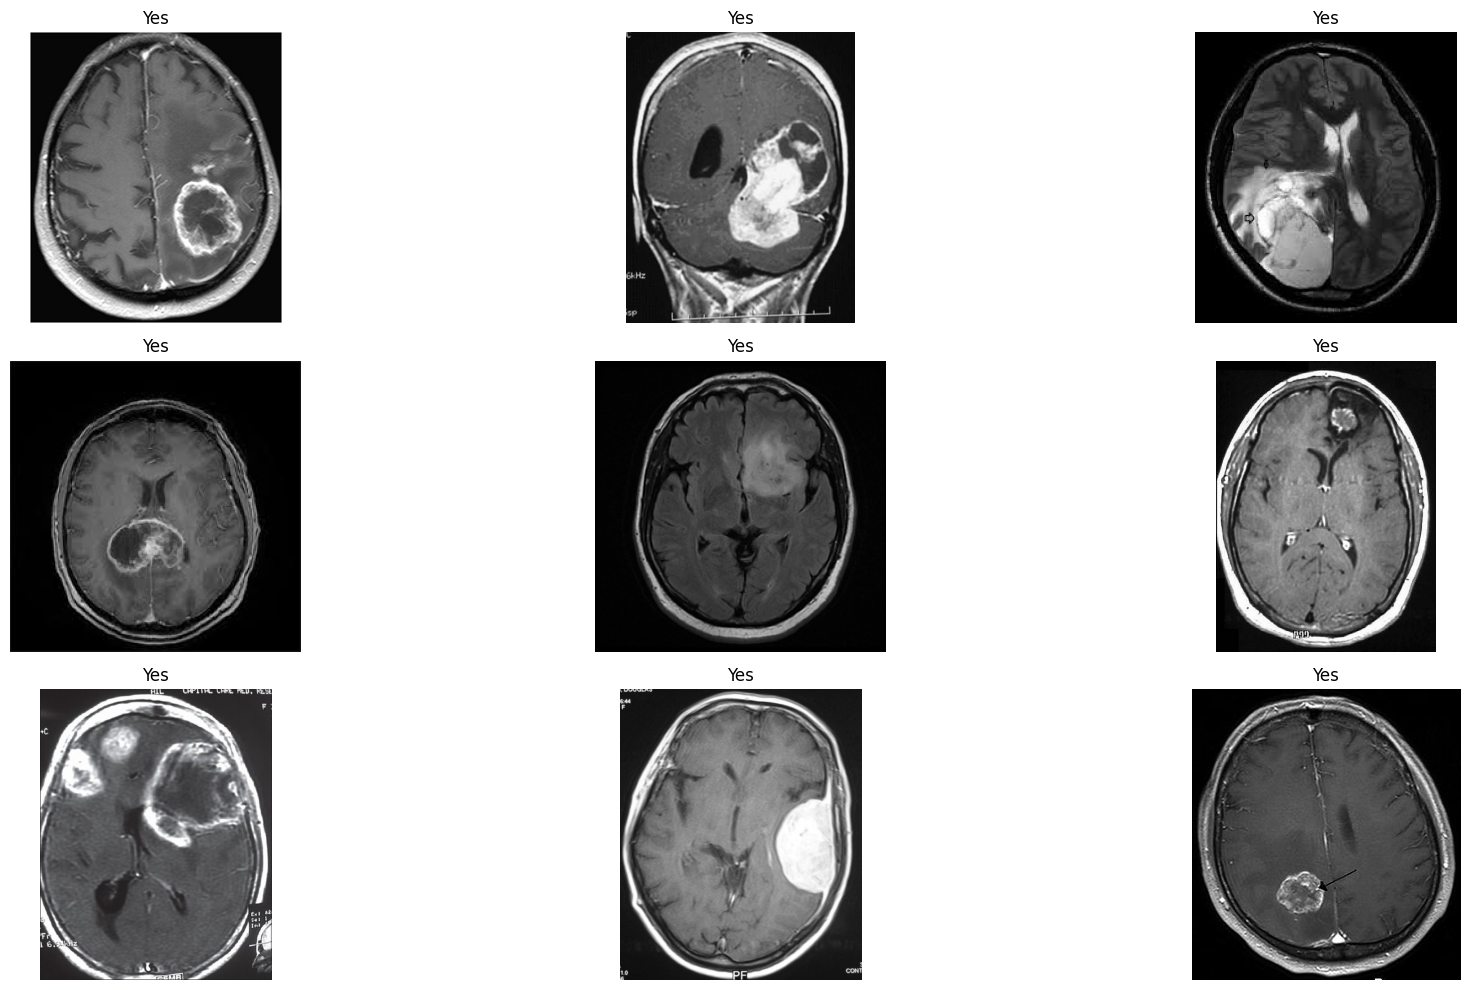

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(yes_dir, yes[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Yes")
plt.tight_layout()

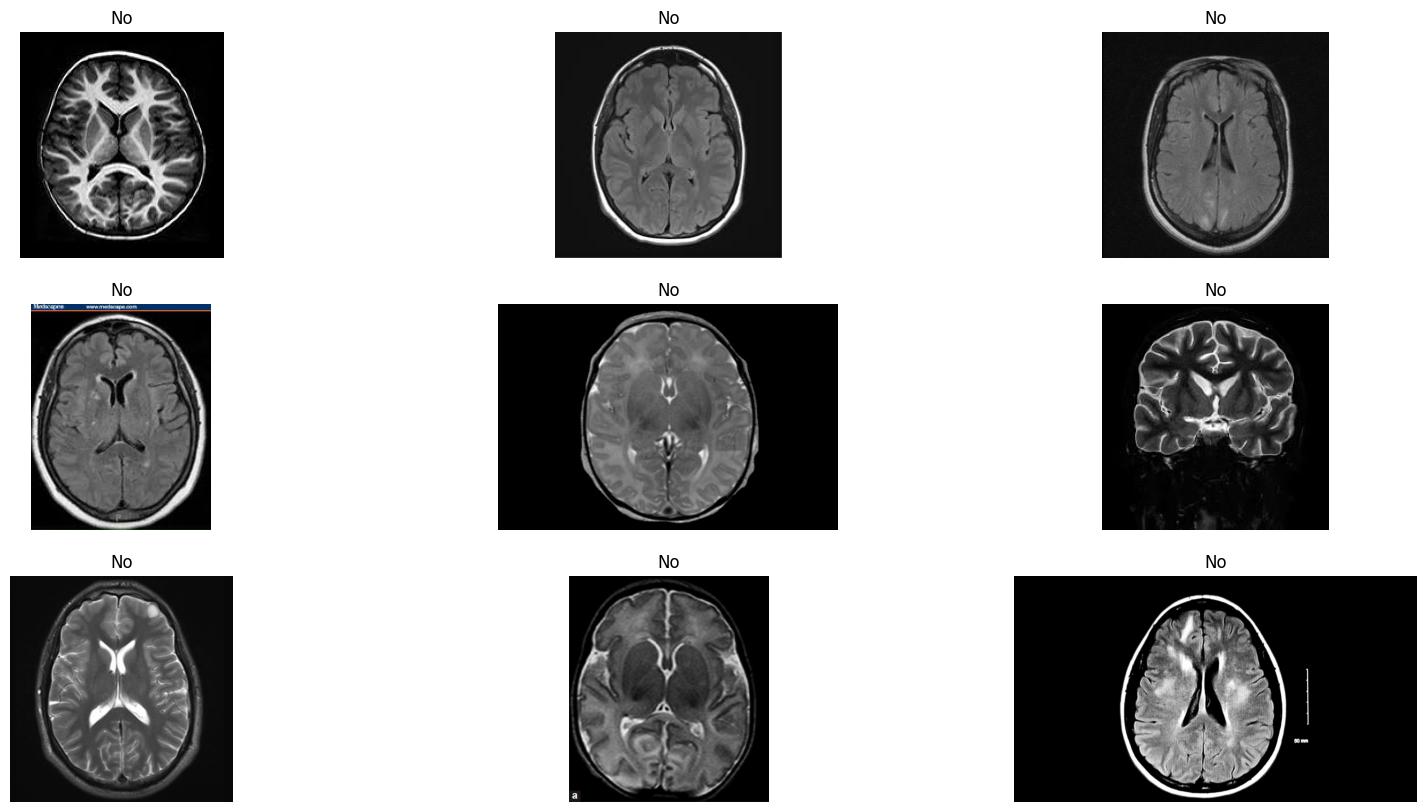

In [ ]:
no = os.listdir("/content/brain_tumor_dataset/train/no")
no_dir = "/content/brain_tumor_dataset/train/no"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(no_dir, no[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("No")

**Let's check out the number of data points we are working with in the dataset.**

120
27
26
60
60


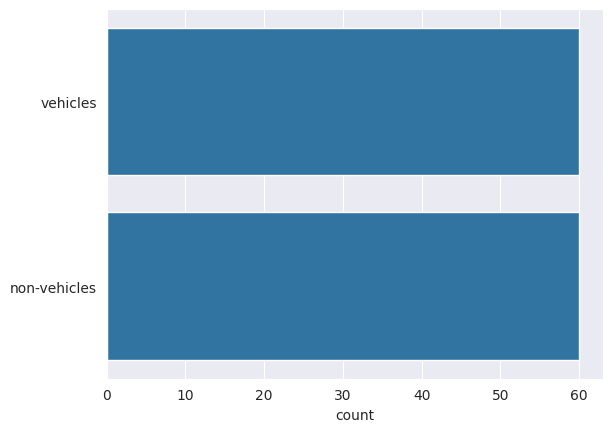

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("vehicles")
    else:
        l.append("non-vehicles")
sns.set_style('darkgrid')

sns.countplot(l)
print(len(train))
print(len(test))
print(len(val))
print(len(yes))
print(len(no))

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

# **Previewing the images of both the classes**

Text(0.5, 1.0, 'yes')

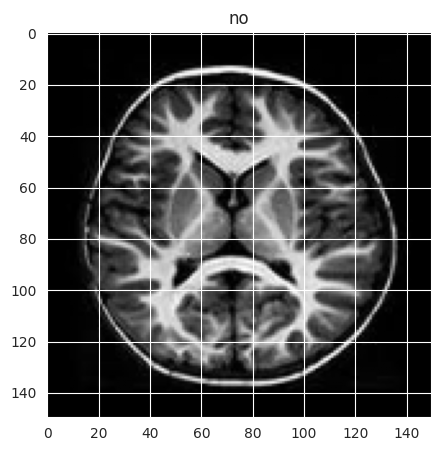

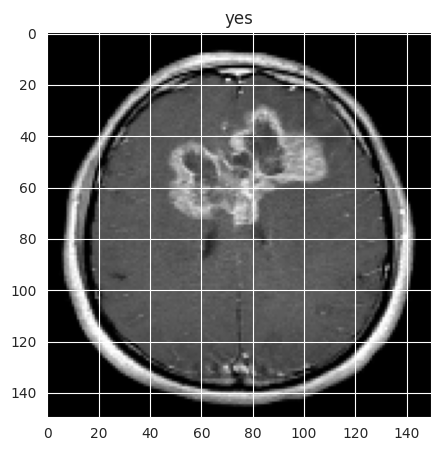

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

**Next, we perform some Data Preprocessing and Data Augmentation before we can proceed with building the model.**

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

# **Normalizing the data**

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
print(x_train.shape)
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 150, 150)
(120, 150, 150, 1)
(27, 150, 150, 1)
(120,)
(27,)


# **Data Augmentation**
In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)
print(x_train.shape)

(120, 150, 150, 1)


# **Training the Model**

**Basic Structure of CNN**



• Input Layer: Inputs raw pixel data from an image.

• Convolutional Layer: Convolution operation produces feature maps.

• Activation Function: Activation function introduces non-linearity to learn complex patterns.

• Pooling Layer (Downsampling): Pooling operation reduces computational complexity and parameter number.

• Flattening: Output from convolutional and pooling layers is flattened into a 1D vector before feeding data into fully connected layers.

• Fully Connected Layer (Dense Layer): Vector is passed through one or more fully connected layers for learning higher-level features.

• Output Layer: Consists of a softmax activation function for multi-class classification problems.

• Training Process: Loss Function measures difference between predicted output and true label.

• Regularization Techniques: Dropout prevents overfitting.

• Batch Normalization improves training speed and stability.

• Hyperparameter Tuning optimizes network performance.


In [ ]:
from keras import models
model = models.Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

**ReduceLROnPlateau** educe learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

The full name of the function in Python is tf.keras.callbacks.ReduceLROnPlateau when using TensorFlow or torch.optim.lr_scheduler.ReduceLROnPlateau when using PyTorch. The specific implementation might vary slightly depending on the deep learning framework you are using, but the basic idea remains the same.

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 1 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5152 - loss: 10.8002 - val_accuracy: 0.6154 - val_loss: 0.6899 - learning_rate: 0.0010


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7037 - loss: 0.6794
Loss of the model is -  0.6794117093086243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7037 - loss: 0.6794
Accuracy of the model is -  70.37037014961243 %


## **Analysis after Model Training**

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8294 - loss: 0.4080 - val_accuracy: 0.5385 - val_loss: 0.6120 - learning_rate: 1.0000e-06
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8034 - loss: 0.4062 - val_accuracy: 0.5769 - val_loss: 0.6796 - learning_rate: 1.0000e-06
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8381 - loss: 0.3713 - val_accuracy: 0.5769 - val_loss: 0.6792 - learning_rate: 1.0000e-06
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8131 - loss: 0.3797 - val_accuracy: 0.5385 - val_loss: 0.7038 - learning_rate: 1.0000e-06
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7815 - loss: 0.3986 - val_accuracy: 0.5385 - val_loss: 0.7026 - learning_rate: 1.0000e-06
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8287 - loss: 0.3988 - val_accuracy: 0.6154 - val_loss: 0.5981 - learning_rate: 1.0000e-06
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8061 - loss:

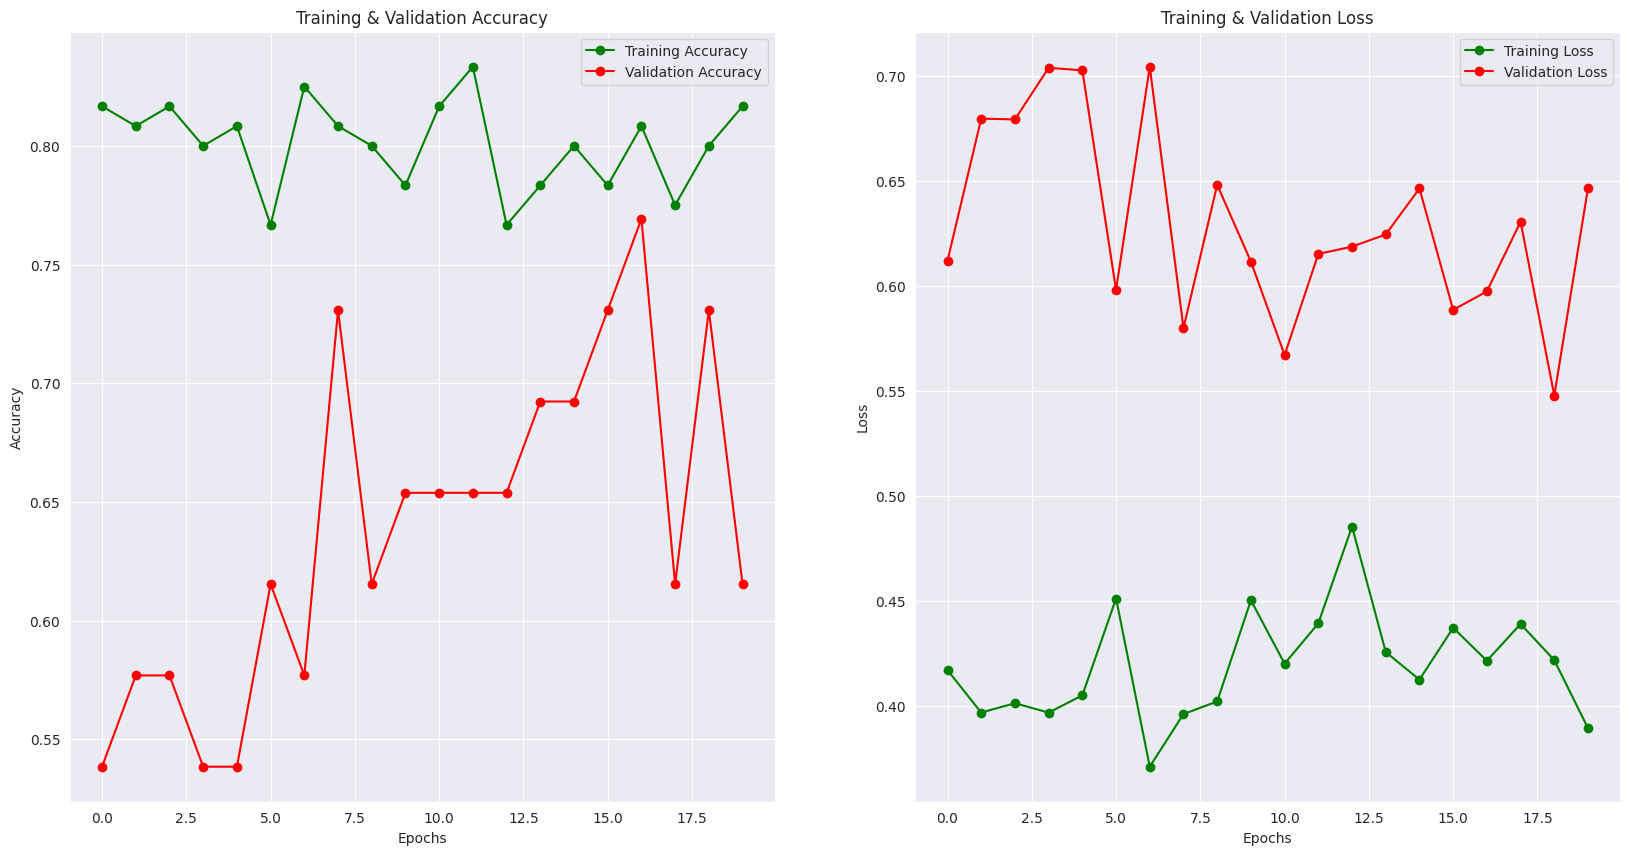

In [ ]:
# Train the model for more epochs
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,  # Increased number of epochs to 20
                    validation_data=datagen.flow(x_val, y_val),
                    callbacks=[learning_rate_reduction])

# Plot the results
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

# **Predictions**

In [ ]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = predictions.reshape(1,-1)[0]

predictions = predictions.flatten()

y_pred = np.where(predictions> 0.5, 1, 0)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
(27, 1)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)

['conv2d', 'batch_normalization', 'max_pooling2d', 'conv2d_1', 'dropout', 'batch_normalization_1', 'max_pooling2d_1', 'conv2d_2']


In [ ]:
#print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.round(abs(predictions)), normalize=False)

14.0

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 13],
       [ 0, 14]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

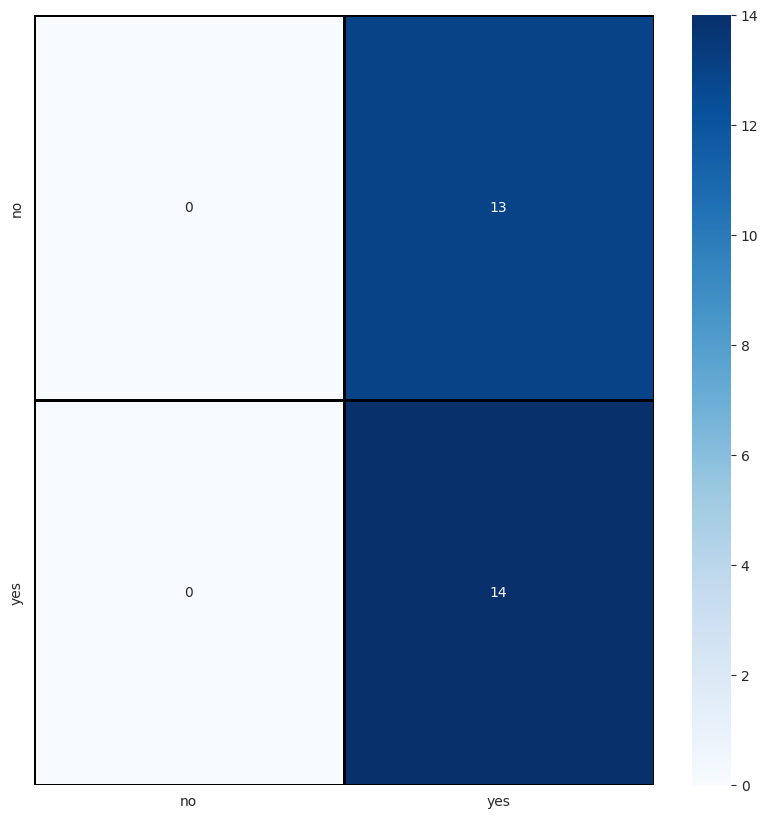

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

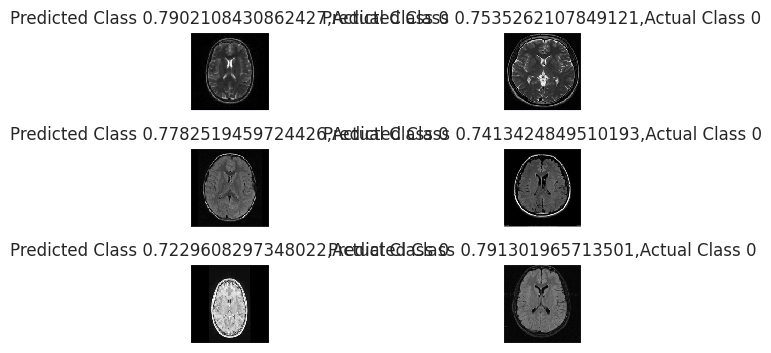

In [ ]:
for c in incorrect[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

Save the Model weights

In [ ]:
# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 (Updated file extension)
model.save_weights("model.weights.h5")

# Delete model to free memory
del model

print("Saved model and weights to disk")


Saved model and weights to disk
